In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import unicodedata
import re

url = 'https://en.wikipedia.org/wiki/List_of_missions_to_the_Moon'
dfs = pd.read_html(url, match='25 October 2006')
crafts = dfs[0]['Spacecraft'].drop_duplicates().to_list()


In [159]:
crafts

['WMAP',
 'Flyby on 30 July 2001 to reach the Earth–Sun L2 Lagrangian point.',
 'SMART-1',
 'Impacted Moon in USGS quadrangle LQ26 at end of mission on 3 September 2006. The impact made the ESA member states collectively the 4th to impact the surface of the Moon.',
 'STEREO A',
 'STEREO B',
 'Both component spacecraft entered heliocentric orbit on 15 December 2006.',
 'ARTEMIS P1',
 'ARTEMIS P2',
 'Two THEMIS spacecraft moved to selenocentric orbit for extended mission; entered orbit July 2011.',
 'Kaguya',
 'Okina',
 'Ouna',
 'Deployed Okina and Ouna satellites. Kaguya and Okina impacted the Moon at end of mission.[73] Ouna completed operations on 29 June 2009[3] but remains in selenocentric orbit.',
 "Chang'e 1",
 'Impacted Moon in USGS quadrangle LQ21 on 1 March 2009, at end of mission. The impact made China the 6th country to impact the surface of the Moon.',
 'Chandrayaan-1',
 'Moon Impact Probe',
 "Succeeded through mission. Orbit lasted 312 days, short of intended 2 years; Howev

In [160]:
dfs[0].groupby('Mission').nth(-1).index

Index([  1,   3,   6,   9,  13,  15,  18,  21,  23,  26,  28,  31,  35,  37,
        41,  44,  46,  50,  55,  57,  59,  71,  76,  78,  82,  84,  88,  92,
        95,  98, 102, 109],
      dtype='int64')

In [161]:
df = dfs[0].drop(dfs[0].groupby('Mission').nth(-1).index).set_index(['Mission', 'Spacecraft'])
footnote_regex = re.compile(r'\[\d+\]')
df['Launch date'] = pd.to_datetime(df['Launch date'].str.replace(footnote_regex, '', regex=True))
dieface1 = unicodedata.lookup('DIE FACE-1')
cubesat_crafts = [x for x in df.index if x[1].startswith(dieface1)]
df.loc[cubesat_crafts, :]

Mission.1 Launch date  \
Mission Spacecraft                                                         
126     ⚀ CAPSTONE                                  CAPSTONE  2022-06-28   
128     ⚀ LunaH-Map                                Artemis 1  2022-11-16   
        ⚀ Lunar IceCube                            Artemis 1  2022-11-16   
        ⚀ CubeSat for Solar Particles              Artemis 1  2022-11-16   
        ⚀ Near-Earth Asteroid Scout                Artemis 1  2022-11-16   
        ⚀ OMOTENASHI                               Artemis 1  2022-11-16   
        ⚀ ArgoMoon                                 Artemis 1  2022-11-16   
        ⚀ EQUULEUS                                 Artemis 1  2022-11-16   
        ⚀ LunIR                                    Artemis 1  2022-11-16   
        ⚀ BioSentinel                              Artemis 1  2022-11-16   
        ⚀ Team Miles                               Artemis 1  2022-11-16   
129     ⚀ Lunar Flashlight                Hakuto-R Mission 1  2022-12-11   
134     ⚀ Iris                         Peregrine Mission One  2024-01-08   
135     ⚀ EagleCam                                      IM-1  2024-02-14   
138     ⚀ ICUBE-Q[112]                             Chang'e 6  2024-05-03   

                                           Carrier rocket         Operator  \
Mission Spacecraft                                                           
126     ⚀ CAPSTONE                               Electron             NASA   
128     ⚀ LunaH-Map                           SLS Block 1             NASA   
        ⚀ Lunar IceCube                       SLS Block 1             NASA   
        ⚀ CubeSat for Solar Particles         SLS Block 1             NASA   
        ⚀ Near-Earth Asteroid Scout           SLS Block 1             NASA   
        ⚀ OMOTENASHI                          SLS Block 1             JAXA   
        ⚀ ArgoMoon                            SLS Block 1              ASI   
        ⚀ EQUULEUS                            SLS Block 1             JAXA   
        ⚀ LunIR                               SLS Block 1  Lockheed Martin   
        ⚀ BioSentinel                         SLS Block 1             NASA   
        ⚀ Team Miles                          SLS Block 1   Fluid & Reason   
129     ⚀ Lunar Flashlight               Falcon 9 Block 5             NASA   
134     ⚀ Iris                         Vulcan Centaur VC2              CMU   
135     ⚀ EagleCam                            Falcon 9 B5             ERAU   
138     ⚀ ICUBE-Q[112]                       Long March 5  SUPARCO[a][114]   

                                            Mission type             Outcome  
Mission Spacecraft                                                            
126     ⚀ CAPSTONE                               Orbiter         Operational  
128     ⚀ LunaH-Map                              Orbiter  Spacecraft failure  
        ⚀ Lunar IceCube                          Orbiter  Spacecraft failure  
        ⚀ CubeSat for Solar Particles              Flyby  Spacecraft failure  
        ⚀ Near-Earth Asteroid Scout                Flyby  Spacecraft failure  
        ⚀ OMOTENASHI                              Lander  Spacecraft failure  
        ⚀ ArgoMoon                                Flybys         Operational  
        ⚀ EQUULEUS                                Flybys         Operational  
        ⚀ LunIR                                    Flyby             Success  
        ⚀ BioSentinel                              Flyby             Success  
        ⚀ Team Miles                               Flyby             Success  
129     ⚀ Lunar Flashlight                       Orbiter  Spacecraft failure  
134     ⚀ Iris                                     Rover           Precluded  
135     ⚀ EagleCam                     Deployable camera  Spacecraft failure  
138     ⚀ ICUBE-Q[112]                           Orbiter         Operational

In [162]:
df.loc[:, ['Launch date', 'Outcome']].set_index('Launch date').resample('5YS', origin=pd.to_datetime('2020-01-01')).count()

,Outcome
Launch date,
2001-01-01,2
2006-01-01,13
2011-01-01,8
2016-01-01,14
2021-01-01,41


In [163]:
# https://stackoverflow.com/questions/62290209/pandas-resample-with-start-date (Tom's answer)
date = '2000-01-01'
rule = '5YS'

df1 = df.loc[:, ['Launch date', 'Outcome']].set_index('Launch date')

base_date = pd.to_datetime(date) - pd.tseries.frequencies.to_offset(rule)
df1.loc[base_date, 'Outcome'] = np.nan
df2 = df1.resample(rule='5YS').count()
print(type(df2))
df2 = df2.iloc[1:, :].rename(columns={'Outcome': 'Launches'})
df2

<class 'pandas.core.frame.DataFrame'>


,Launches
Launch date,
2000-01-01,2
2005-01-01,12
2010-01-01,9
2015-01-01,10
2020-01-01,45


Text(0.5, 0, '')

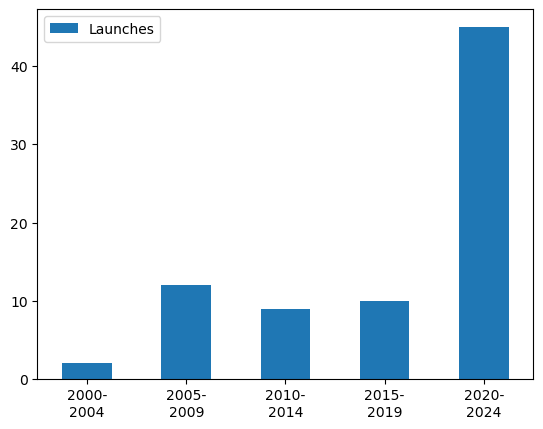

In [164]:
nl = '\n'
df2['xlabels'] = [f'{x}-{nl}{x + 4}' for x in range(2000, 2025, 5)]

df2.set_index('xlabels', drop=True).plot(kind='bar', rot=0)
plt.xlabel('')


In [165]:
df3 = df.loc[:, ['Launch date', 'Operator']]
df3['Yr'] = df3['Launch date'].dt.year
df3 = df3.groupby(['Yr', 'Operator']).count().rename(columns={'Launch date': ''})
big_operators = ['NASA', 'CNSA', 'ISRO', 'JAXA']
df3 = (df3.loc[df3.index.get_level_values(1).isin(big_operators)]
          .unstack(fill_value=0))
print(df3.index.name)
print(df3.index)
df3.columns = [x[1] for x in df3.columns]

Yr
Index([2001, 2006, 2007, 2008, 2009, 2010, 2011, 2013, 2014, 2018, 2019, 2020,
       2022, 2023, 2024],
      dtype='int32', name='Yr')


In [166]:
print(type(df3))
2012 in df3.index

<class 'pandas.core.frame.DataFrame'>


False

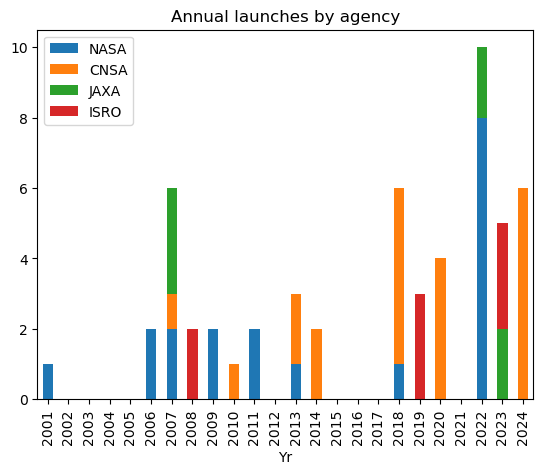

In [167]:
for x in range(2001, 2025):
    if x not in df3.index:
        df3.loc[x] = [0, 0, 0, 0]
df3 = df3.sort_index(axis=0)
_ = df3.plot(kind='bar', stacked=True, title='Annual launches by agency')

In [178]:

df['Not Fail'] = ~df['Outcome'].str.contains('[Ff]ailure')
print(df.columns)
df4 = df.loc[:, ['Operator', 'Not Fail', 'Outcome']].groupby(['Operator', 'Not Fail']).count().unstack(1, fill_value=0)
df4

Index(['Mission.1', 'Launch date', 'Carrier rocket', 'Operator',
       'Mission type', 'Outcome', 'Not Fail'],
      dtype='object')


Outcome      
Not Fail                                             False True 
Operator                                                        
ASI                                                      0     1
Astrobotic Technology                                    1     0
CAS                                                      0     2
CMU                                                      0     1
CNSA                                                     1    20
Deep Space Exploration Laboratory (DSEL, Tiandu...       0     2
ERAU                                                     1     0
ESA                                                      0     2
Fluid & Reason                                           0     1
ISRO                                                     1     7
Intuitive Machines                                       0     1
JAXA                                                     1     6
KARI                                                     0     1
Lockheed Martin                                          0     1
LuxSpace                                                 0     1
NASA                                                     5    14
Roscosmos                                                1     0
SUPARCO[a][114]                                          0     1
SpaceIL                                                  1     0
Tomy / JAXA / Doshisha University                        0     1
Tomy/JAXA/Dodai                                          0     1
UAESA/MBRSC                                              0     1
UNAM                                                     0     1
ispace                                                   1     0

In [180]:
df4.columns = ['Not Fail', 'Fail']
df4

,Not Fail,Fail
Operator,,
ASI,0,1
Astrobotic Technology,1,0
CAS,0,2
CMU,0,1
CNSA,1,20
"Deep Space Exploration Laboratory (DSEL, Tiandu Lab)[107]",0,2
ERAU,1,0
ESA,0,2
Fluid & Reason,0,1


In [181]:
df5 = (
    df.loc[:, ['Operator', 'Not Fail', 'Outcome']].groupby(['Operator', 'Not Fail'])
      .value_counts(normalize=True)
)
df5

Operator                                                   Not Fail  Outcome           
ASI                                                        True      Operational           1.000000
Astrobotic Technology                                      False     Spacecraft failure    1.000000
CAS                                                        True      Operational           1.000000
CMU                                                        True      Precluded             1.000000
CNSA                                                       False     Spacecraft failure    1.000000
                                                           True      Success               0.600000
                                                                     Operational           0.400000
Deep Space Exploration Laboratory (DSEL, Tiandu Lab)[107]  True      Operational           1.000000
ERAU                                                       False     Spacecraft failure    1.000000
ESA         